In [102]:
import pandas as pd
import locale
import matplotlib.pyplot as plt


Ler arquivo


In [103]:
dados = pd.read_excel("dados_vendas_brutos_corrigidos.xlsx", engine="openpyxl")

In [104]:
dados['data'] = pd.to_datetime(dados['data'],errors="coerce")

1.1  Crie uma nova coluna contendo o nome do mês por extenso (em português)


In [105]:
dados['nome_mes'] = dados['data'].dt.month_name(locale="pt_BR")


1.2 Crie uma coluna com o nome do dia da semana (em português)


In [106]:
dados['nome_dia'] = dados['data'].dt.day_name(locale="pt_BR")

1.3 Crie uma coluna no formato "Mês/Ano" para agrupamentos mensais


In [107]:
dados['mes_ano'] = dados['data'].dt.to_period("M")

2.1 Crie uma nova coluna calculando o valor total de cada venda (quantidade × preço unitário)


In [108]:

dados['valor_total'] = dados['quantidade']*dados['preco_unitario']

2.2 Ajuste o formato para duas casas decimais

In [109]:

dados['valor_total'] = dados['valor_total'].round(2)

Missao 3

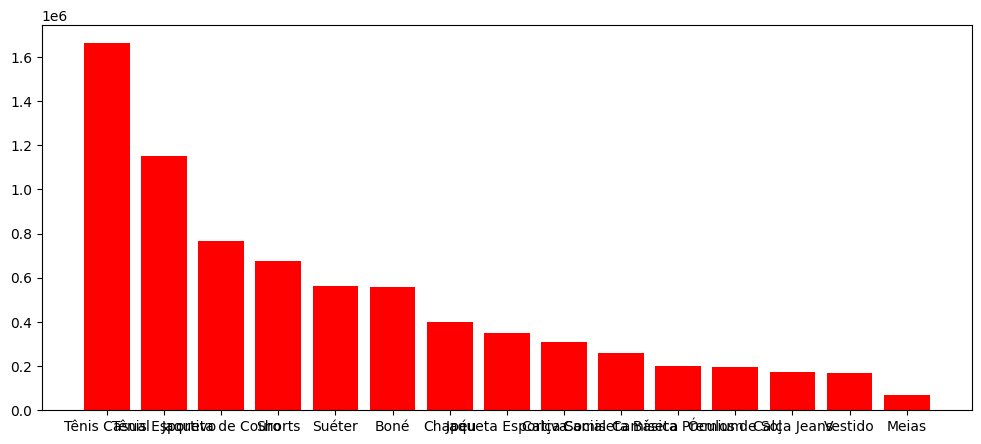

In [110]:
# Gráfico Produto Venda

produto_venda = dados.groupby("produto").agg(
    total_venda=("valor_total", "sum")
).reset_index().sort_values("total_venda", ascending=False)

plt.figure(figsize=(12,5))

plt.bar(produto_venda["produto"], produto_venda["total_venda"], color="red")
plt.show()

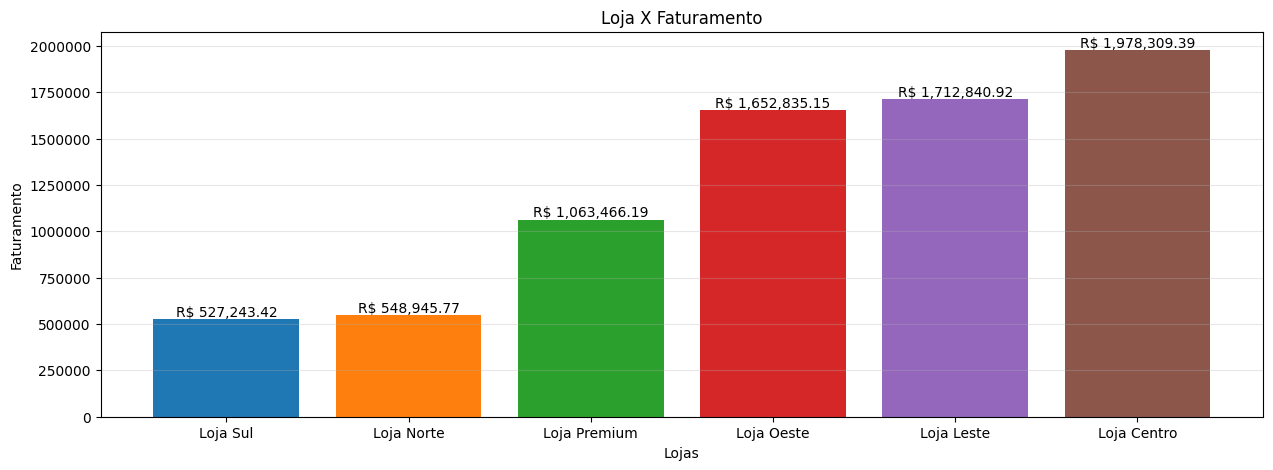

In [111]:
# Gráfico de Barras Faturamento por Loja

faturamento_loja = dados.groupby("loja").agg(
    total_venda = ("valor_total", "sum")
).reset_index().sort_values("total_venda", ascending=True)


cores = plt.cm.tab10(range(len(faturamento_loja["loja"])))

plt.figure(figsize=(15,5))

barras = plt.bar(faturamento_loja["loja"], faturamento_loja["total_venda"], color = cores)

plt.title("Loja X Faturamento")

plt.xlabel("Lojas")
plt.ylabel("Faturamento")

plt.ticklabel_format(style="plain", axis="y")

plt.grid(True, axis="y", alpha=0.3)


for bar in barras:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"R$ {bar.get_height():,.2f}",
        ha="center",
        va="bottom"

    )


plt.show()

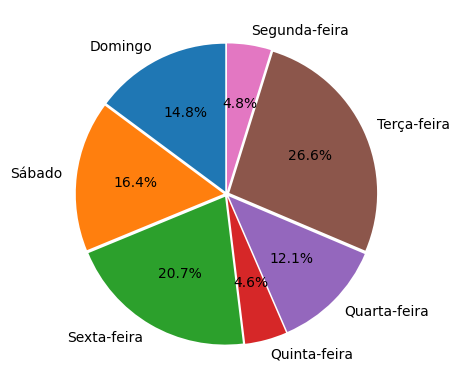

In [119]:
# Gráfico 2: Distribuição Semanal

dia_faturamento = dados.groupby("nome_dia").agg(
    total_venda = ("valor_total", "sum")
).reset_index()

dias_ordenado = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]

dia_faturamento["nome_dia"] = pd.Categorical(
    dia_faturamento["nome_dia"],
    categories=dias_ordenado,
    ordered=True
)

explode = [0.02] * len(dia_faturamento["nome_dia"])

dia_faturamento = dia_faturamento.sort_values("nome_dia", ascending=False)

plt.pie(dia_faturamento["total_venda"], labels=dia_faturamento["nome_dia"], autopct="%1.1f%%", startangle=90, explode=explode)

# plt.legend(
#     dia_faturamento["nome_dia"],
#     title="Dia da Semana",
#     loc="best"
# )

plt.show()